# EDA to check image balancing and quality

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# remove each file from the directory
# iterate through each folder in the directory
for folder in os.listdir('raw_data/archive/train'):
    for file in os.listdir(f'raw_data/archive/train/{folder}'):
        print(f'Checking {file} in {folder}')
        if ':Zone.Identifier' in file:
            # remove the file
            os.remove(f'raw_data/archive/train/{folder}/{file}')
            print(f'Removed {file} from {folder}')

Checking Training_15256337.jpg in disgust
Checking Training_43545246.jpg in disgust
Checking Training_1070239.jpg in disgust
Checking Training_99747227.jpg in disgust
Checking Training_81772924.jpg in disgust
Checking Training_61032772.jpg in disgust
Checking Training_20322339.jpg in disgust
Checking Training_82363963.jpg in disgust
Checking Training_36831728.jpg in disgust
Checking Training_84874359.jpg in disgust
Checking Training_12950225.jpg in disgust
Checking Training_46951397.jpg in disgust
Checking Training_23533665.jpg in disgust
Checking Training_49735203.jpg in disgust
Checking Training_55341728.jpg in disgust
Checking Training_40939984.jpg in disgust
Checking Training_24609766.jpg in disgust
Checking Training_64347942.jpg in disgust
Checking Training_60674497.jpg in disgust
Checking Training_28365203.jpg in disgust
Checking Training_52126443.jpg in disgust
Checking Training_31277732.jpg in disgust
Checking Training_48227146.jpg in disgust
Checking Training_33820609.jpg in d

In [7]:

print(os.listdir('raw_data/archive/train'))

emotions_count = pd.DataFrame(columns=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'], index=['test', 'train']) # this is an empty dataset where we will store the counts for each file 


['disgust', 'angry', 'surprise', 'happy', 'neutral', 'sad', 'fear']


In [9]:

columns=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

total_files = 0

path = 'raw_data/archive/train/'
for folder in os.listdir(path):
    for file in os.listdir(f'{path}{folder}'):
        if file.endswith('.jpg'):
            total_files += 1    
    emotions_count.loc['train', folder] = total_files
    total_files = 0

path = 'raw_data/archive/test/'
for folder in os.listdir(path):
    for file in os.listdir(f'{path}{folder}'):
        if file.endswith('.jpg'):
            total_files += 1    
    emotions_count.loc['test', folder] = total_files
    total_files = 0

emotions_count

,angry,disgust,fear,happy,sad,surprise,neutral
test,958,111,1024,1774,1247,831,1233
train,3995,436,4097,7215,4830,3171,4965


## Visualize the distribution of each file available

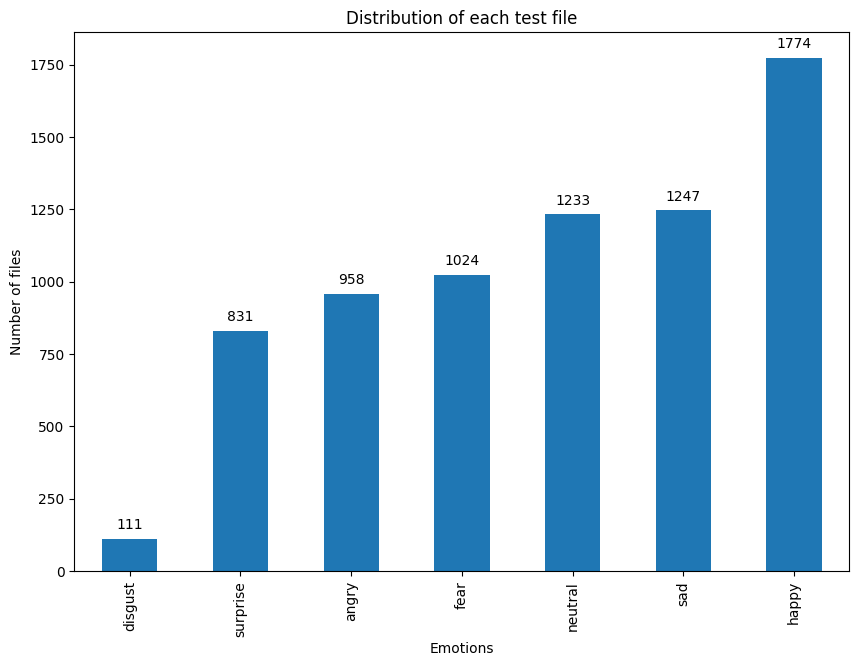

In [23]:
plot = emotions_count.loc['test'].sort_values().plot(kind='bar', figsize=(10, 7), title='Distribution of each test file', xlabel='Emotions', ylabel='Number of files')

for p in plot.patches:
    plot.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

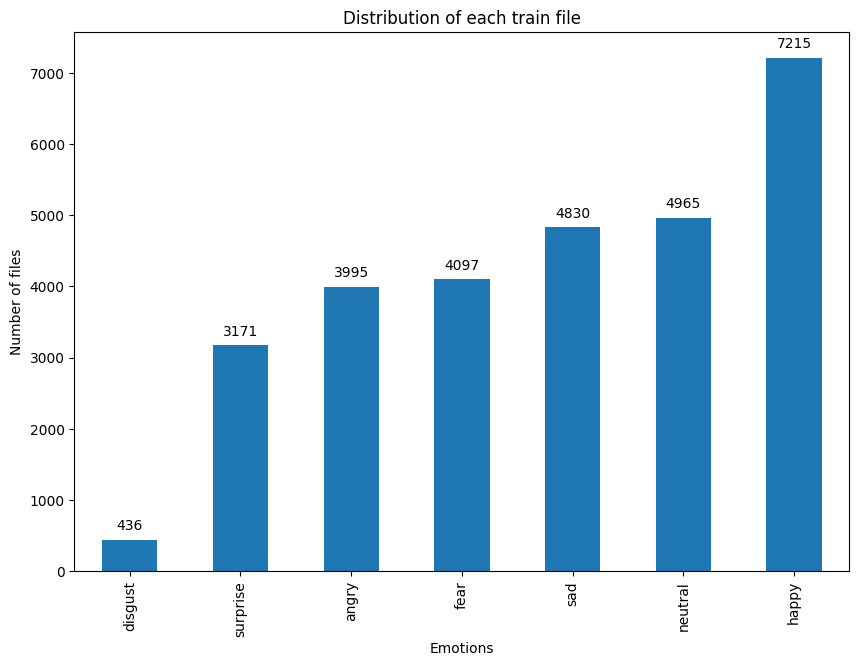

In [24]:
plot = emotions_count.loc['train'].sort_values().plot(kind='bar', figsize=(10, 7), title='Distribution of each train file', xlabel='Emotions', ylabel='Number of files')

for p in plot.patches:
    plot.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

## Lets check if each image is size 48x48

In [26]:
from PIL import Image

path = 'raw_data/archive/train/'

images_not_48x48 = []
for folder in os.listdir(path):
    for file in os.listdir(f'{path}{folder}'):
        if file.endswith('.jpg'):
            img = Image.open(f'{path}{folder}/{file}')
            if img.size != (48, 48):
                images_not_48x48.append((file, folder, img.size))
                print(f'Image {file} in {folder} is not 48x48, it is {img.size}')
        
if len(images_not_48x48) == 0:
    print('All images are 48x48')
                

All images are 48x48
